In [5]:
# Installing gensim to later use it in our bar chart

!pip install -U gensim

In [11]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import random
import io
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
from collections import Counter
from gensim.parsing.preprocessing import remove_stopwords

In [7]:
# Defining the dataset and opening it 

data=pd.read_csv("Bars.txt", sep='\t',names=['text'])

In [16]:
# First look at the text file by using the .head() function of pandas

data.head()

,text
0,text
1,Heartbreak drowned sorrows in a large steak
2,Why you always all on my back?
3,Why you gotta do me like that?
4,Why you gotta act like a bitch when I'm with you?


In [17]:
# Size of the dataset

print("Size of Dataset:",data.shape)

Size of Dataset: (172160, 1)


In [8]:
# This parten is taken from assignment 3

# Splitting the data into a train and validation set by splitting it into 80% fro training and 20% for validation 

training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 137682
No. of testing examples: 34421


In [15]:
# Description of the dataset
data.describe()

,text
count,172160
unique,140583
top,Yeah
freq,136


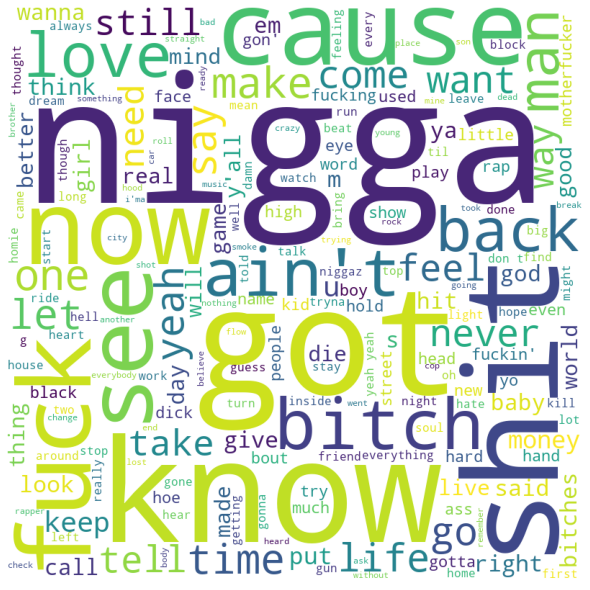

In [14]:
## WORD CLUSTERING
'''Creates a word cluster by making tokens out of the string of values and appending them to an empty string.
   After that we create an empty squared canvas and we use matplotib.pylot to create a WordCloud and plot the images'''
comment_words = ''
stopwords = set(STOPWORDS)
 
# Iterate through the txt file
for val in data.text:
     
    # Typecaste each val to string
    val = str(val)
 
    # Split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# Plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

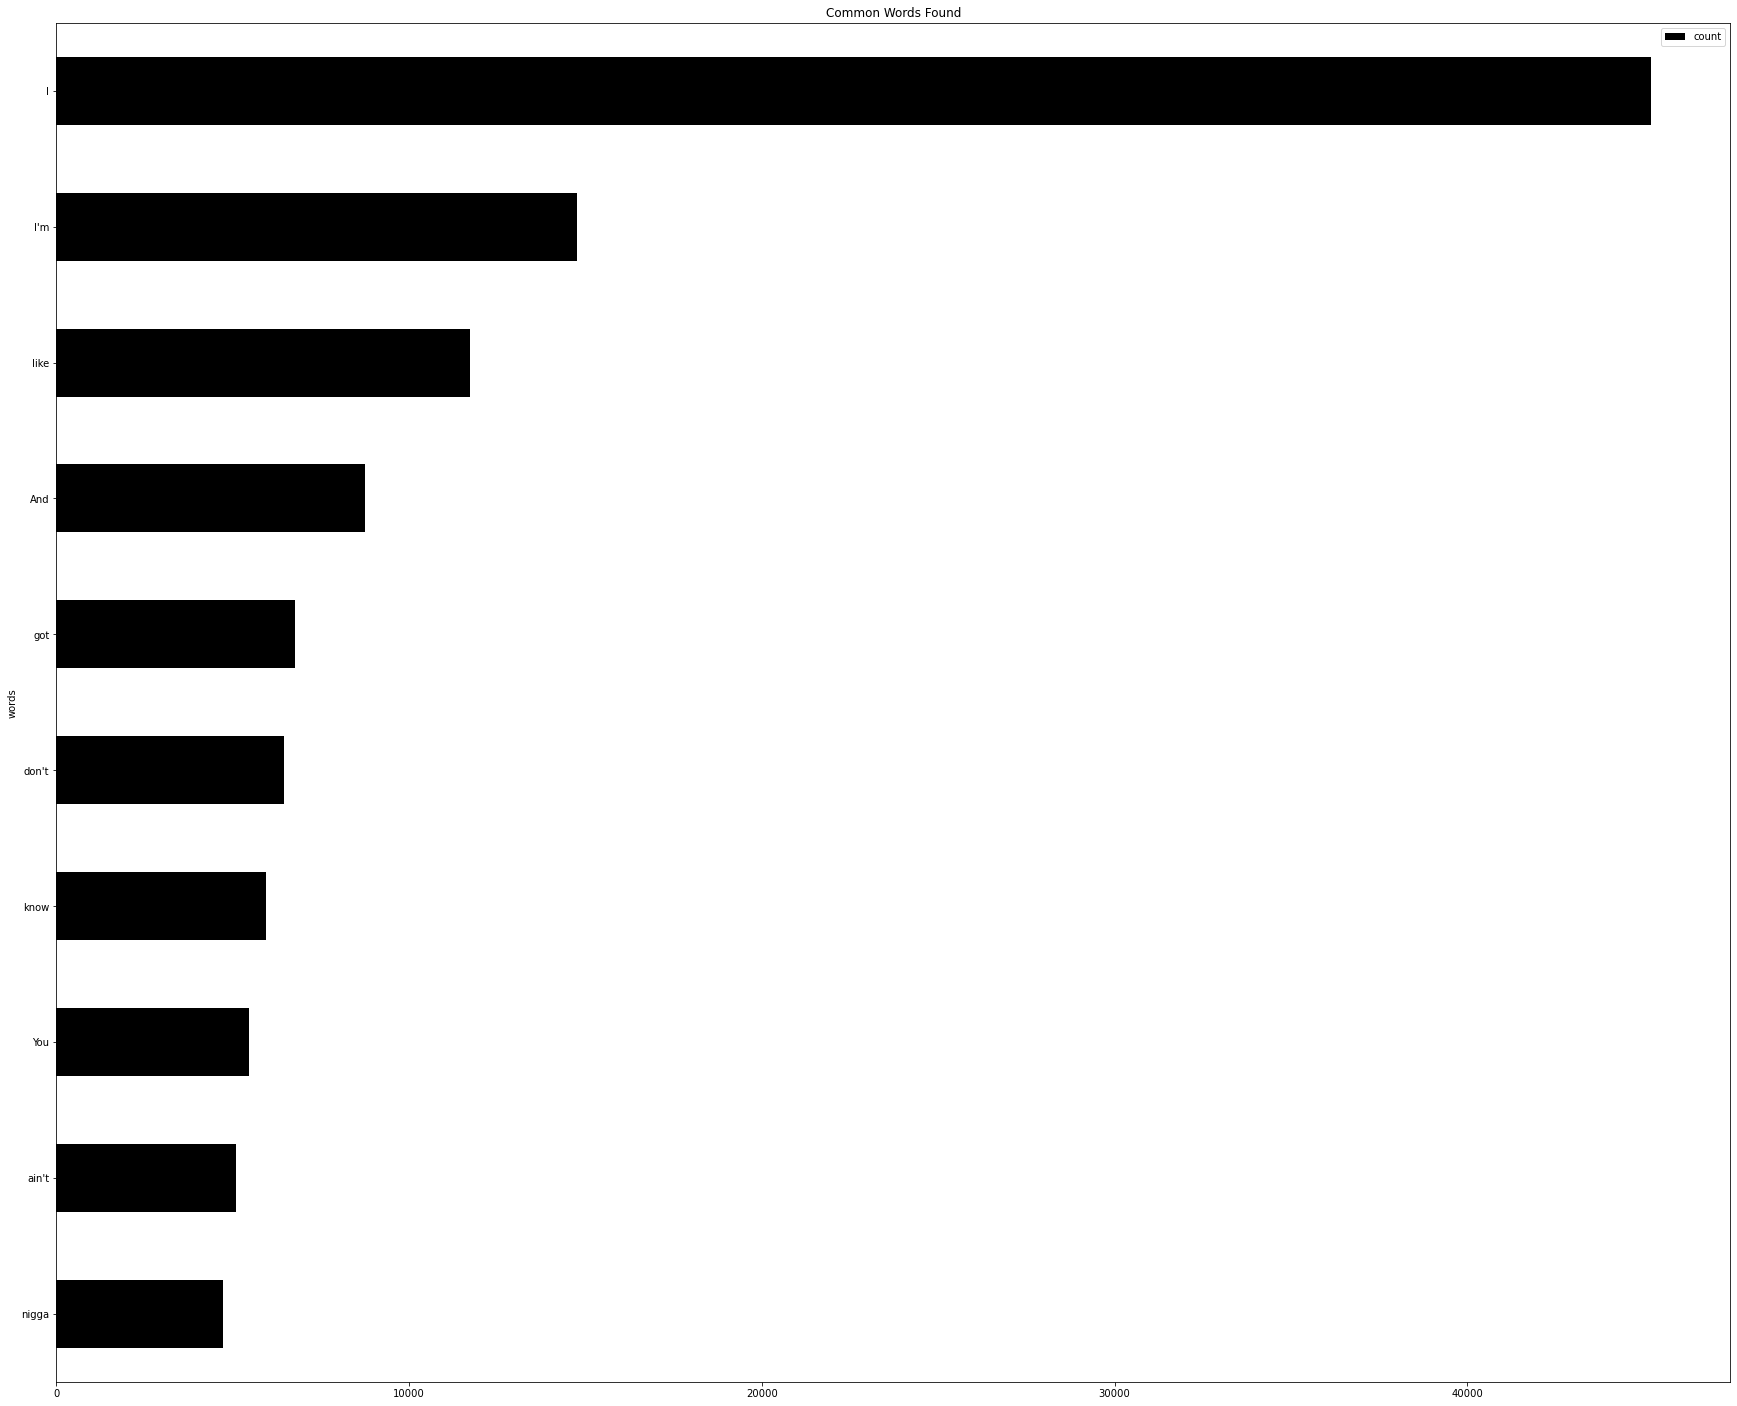

In [13]:
## BAR CHART
'''We used the gensim library and created a counter that would go up based on how many times the words will appear
   in the text. Then we made a bar chart of the ten most common words.'''

# Defining the text_file for the chart
text_file = "Bars.txt"

# Creating the counter function
cnt = Counter()

# Opening and reading the txt file
bars = open(text_file, "r", encoding='utf-8').read()

# Removing the stopwords
filtered_bars = remove_stopwords(bars)

# Counting how many times each word appears in the txt file 
for text in filtered_bars.split():
    cnt[text] += 1

# Defining the word frequencies and how many common words we want to shoe in the chart
word_freq = pd.DataFrame(cnt.most_common(10),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(30,25))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="black")
ax.set_title("Common Words Found")
plt.show()